# Related to Comp Graph Module Training: protoDUNE-HD
### --Created by Shuaixiang (Shu)
### --Aug 5, 2024

## The following evaluation scripts are based on 40000Files_8192_lossFunc3
<br />
<br />
<br />


### Read txt files and general output:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


#------------------------------------------
opName = 'opch133'
#------------------------------------------

#read data---
posX = []
posY = []
posZ = []
emulValues = []

with open('./data/{}_xPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posX.append(float(currentPlace))
with open('./data/{}_yPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posY.append(float(currentPlace))
with open('./data/{}_zPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posZ.append(float(currentPlace))
      
with open('./data/{}_emulValues.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        emulValues.append(float(currentPlace))  
        
        
        
        
        
print("Length of posX: ", len(posX))
print("Length of posY: ", len(posY))
print("Length of posZ: ", len(posZ))

print("Length of emulValues: ", len(emulValues))



Length of posX:  505750
Length of posY:  505750
Length of posZ:  505750
Length of emulValues:  505750


In [5]:
print("Max value of emulValues: ", max(emulValues))

#index of the maximum value
max_index = emulValues.index(max(emulValues))

print("Position of max value: (x, y, z) = (", posX[max_index], ",", posY[max_index], ",", posZ[max_index], ")")



Max value of emulValues:  126563.0
Position of max value: (x, y, z) = ( -345.0 , 395.0 , 145.0 )


<br />
<br />
<br />

## PE Yield of certain X plane:

RATIO:  0.003094

len(YZ_z): 5950
len(YZ_y):  5950

len(YZ_z)*len(YZ_y):  35402500

Size of x105_emul:  5950

len(z_edges): 86
len(y_edges): 71


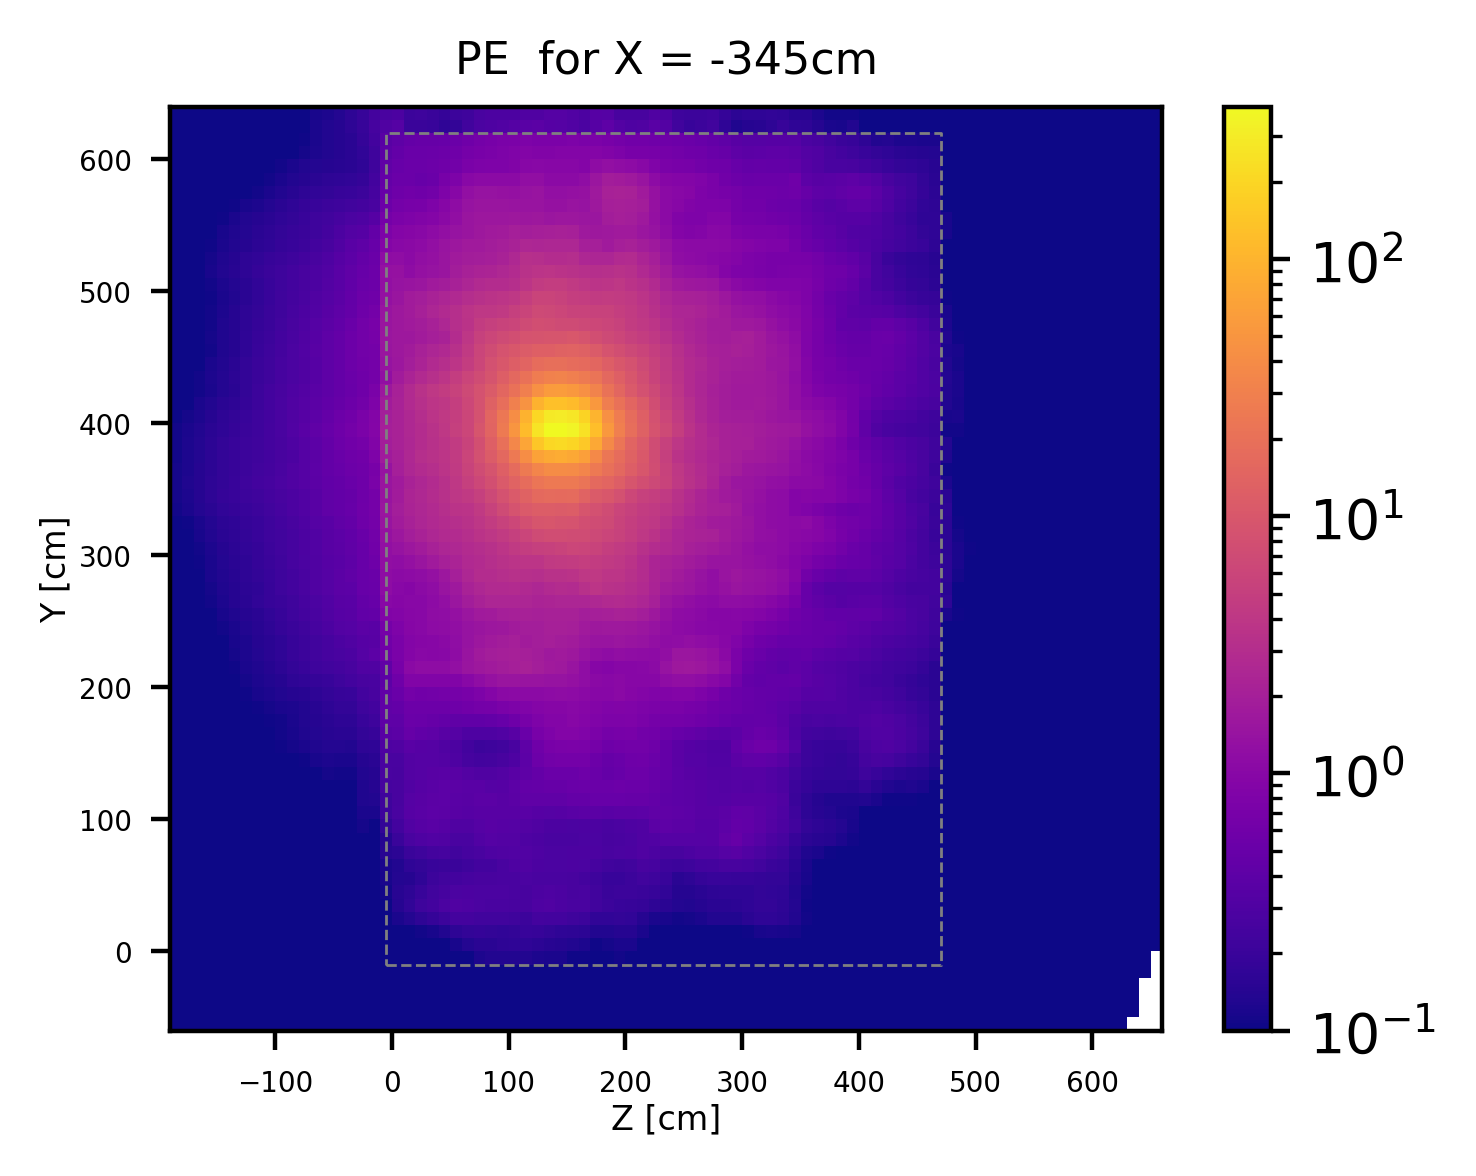

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors



#Calculaiton based on Tinjun's slides (20240708)=======================
#on protoDUNE PDS Sim/Reco meeting=====================================
L = 9.1*100000 #Total light yield for E=36.7MeV, R=0.625---
T = 0.68 #transmission efficiency (pass APA wires)---
A = 0.02 #(X-)Arapuca PDE---
F = 0.25 #Shu: 20250128; only consider fast component---

ratio = T * A * L * F / 1000000
print("RATIO: ", ratio)





#Bin num and range===================================================
z_bins = 85
y_bins = 70
z_range = (-190, 660)
y_range = (-60, 640)

#empty 2D array to hold the bin values---
histogram = np.zeros((y_bins, z_bins))


#YZ plane---
YZ_z = []
YZ_y = []
for i in range(0, len(posX)):
    if posX[i] == 105: #for any value!
        YZ_z.append(posZ[i])
        YZ_y.append(posY[i])
    
print("\nlen(YZ_z):", len(YZ_z))
print("len(YZ_y): ", len(YZ_y))





#X plane of [100, 110], 2D histograms============================
plt.figure(figsize=(4,3),dpi=400)

#Key------------------------
plane_X = -340 #The value must locat at grid of 5cm--
plane_X -= 5
#---------------------------

x105_emul = []
for i in range(0, len(posX)):
    if posX[i] == plane_X:
        x105_emul.append(emulValues[i])
    else:
        continue

print("\nSize of x105_emul: ", len(x105_emul))


for i in range(0, len(YZ_z)):
    y_index = int((YZ_y[i] + 55) / 10)
    z_index = int((YZ_z[i] + 185) / 10)
    
    histogram[y_index, z_index] = x105_emul[i] * ratio


#edges---
z_edges = np.linspace(z_range[0], z_range[1], z_bins + 1)
y_edges = np.linspace(y_range[0], y_range[1], y_bins + 1)

print("\nlen(z_edges):", len(z_edges))
print("len(y_edges):", len(y_edges))


#plot---
#plt.pcolormesh(z_edges, y_edges, histogram, shading='auto', cmap='plasma')
#colorbar = plt.colorbar()

norm = mcolors.LogNorm(vmin=0.1, vmax=histogram.max())  # Avoid log(0) issues
pcm = plt.pcolormesh(z_edges, y_edges, histogram, shading='auto', cmap='plasma', norm=norm)
colorbar = plt.colorbar()

#field cage plot---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')


plt.ylabel('Y [cm]', labelpad=1, fontsize=6)
plt.xlabel('Z [cm]', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

x_tmp = int(plane_X)
plt.title('PE  for X = {}cm'.format(x_tmp), fontsize=8)
plt.show()






<br />
<br />
<br />
<br />
<br />
<br />

## PE Distribution in space:

# event in [0, 100]         :  418278
# event in (100, 1000]      :  77028
# event in (1000, 10000]    :  10141
# event in (10000, 100000]  :  299
# event in (100000, 1000000]:  4

Total event nums            :  505750

list length of [0, 100]         :  418278
list length of (100, 1000]      :  77028
list length of (1000, 10000]    :  10141
list length of (10000, 100000]  :  299
list length of (100000, 1000000]:  4


length of groupX[ 0 ]:  418278
length of groupY[ 0 ]:  418278
length of groupZ[ 0 ]:  418278
length of groupX[ 1 ]:  77028
length of groupY[ 1 ]:  77028
length of groupZ[ 1 ]:  77028
length of groupX[ 2 ]:  10141
length of groupY[ 2 ]:  10141
length of groupZ[ 2 ]:  10141
length of groupX[ 3 ]:  299
length of groupY[ 3 ]:  299
length of groupZ[ 3 ]:  299
length of groupX[ 4 ]:  4
length of groupY[ 4 ]:  4
length of groupZ[ 4 ]:  4


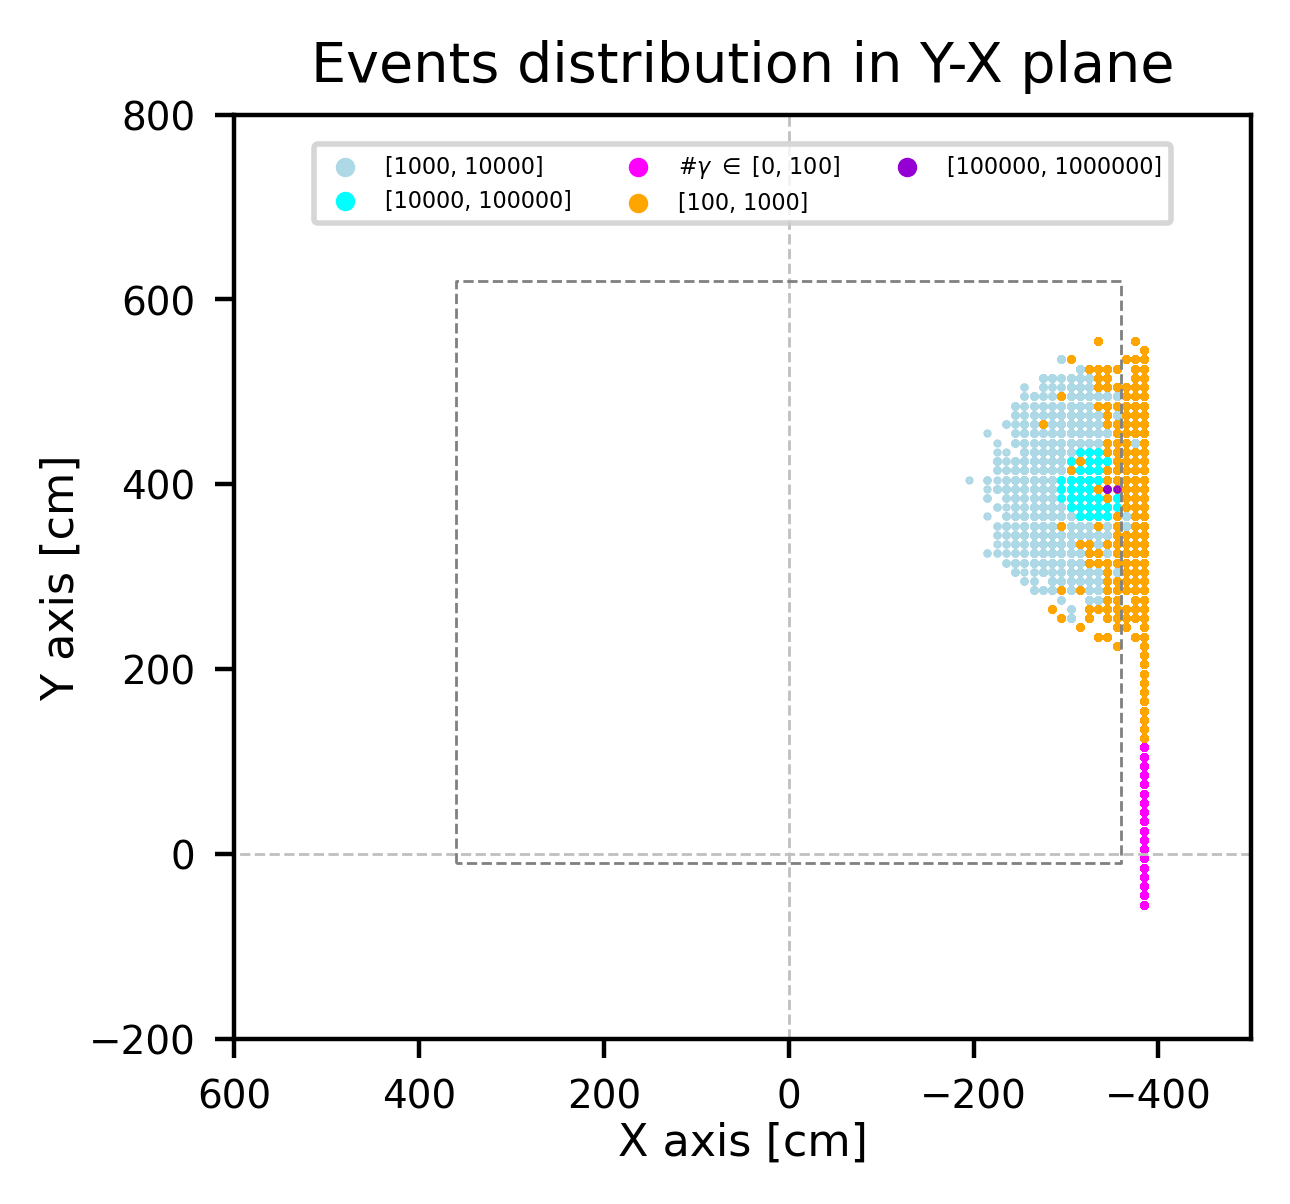

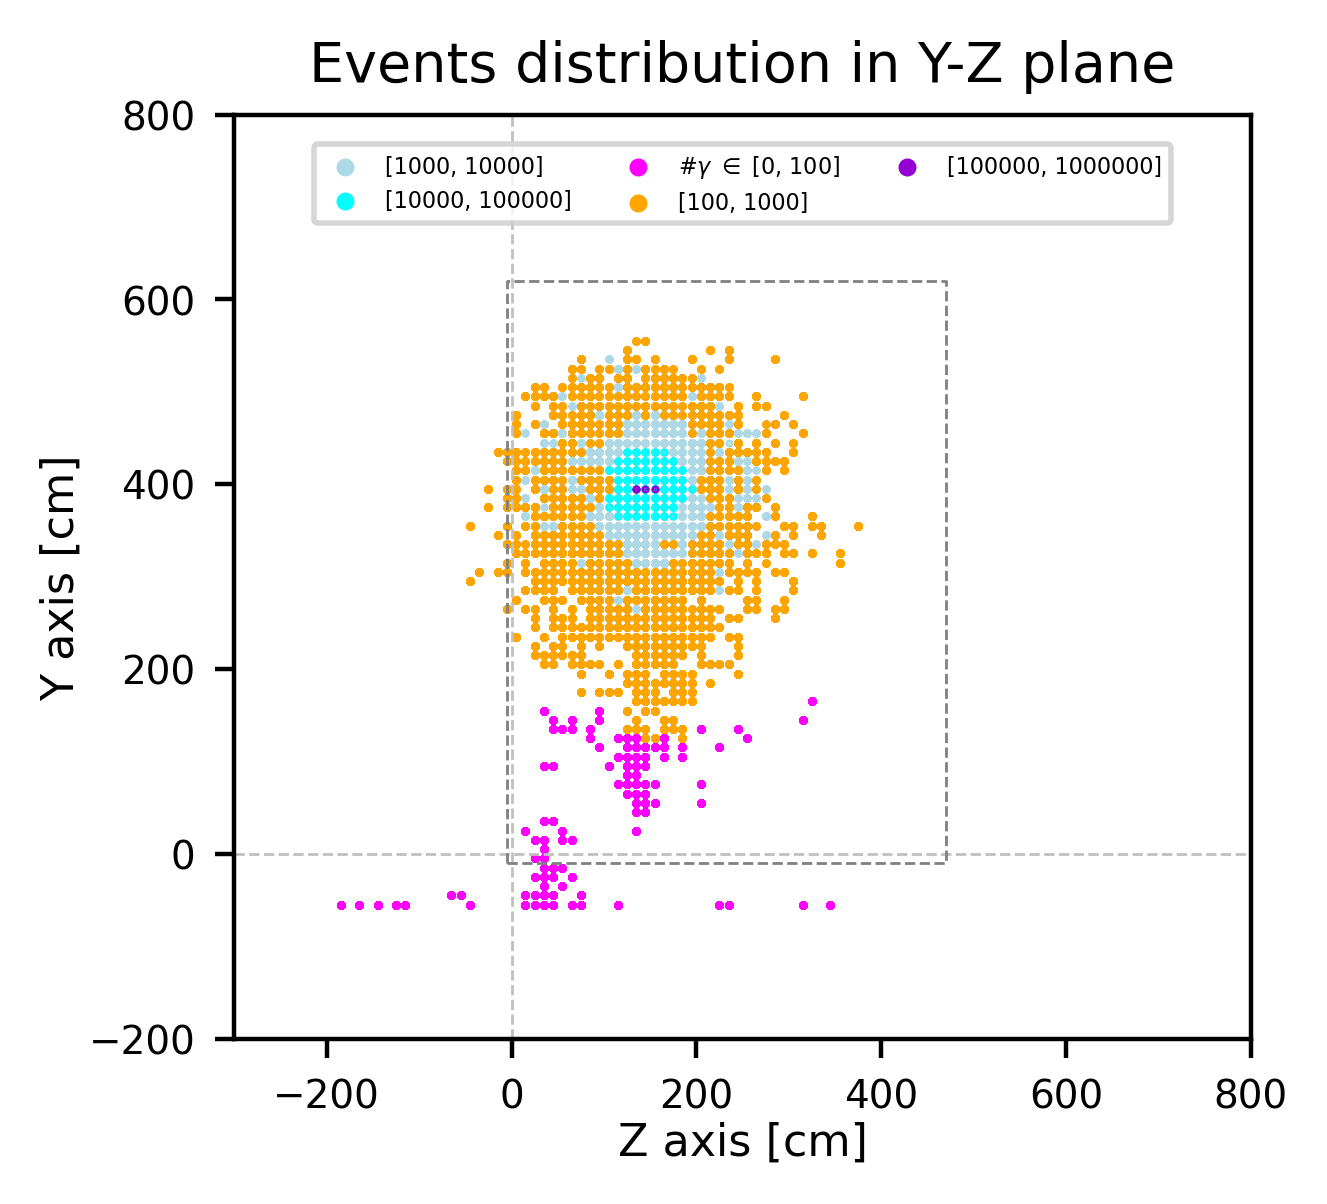

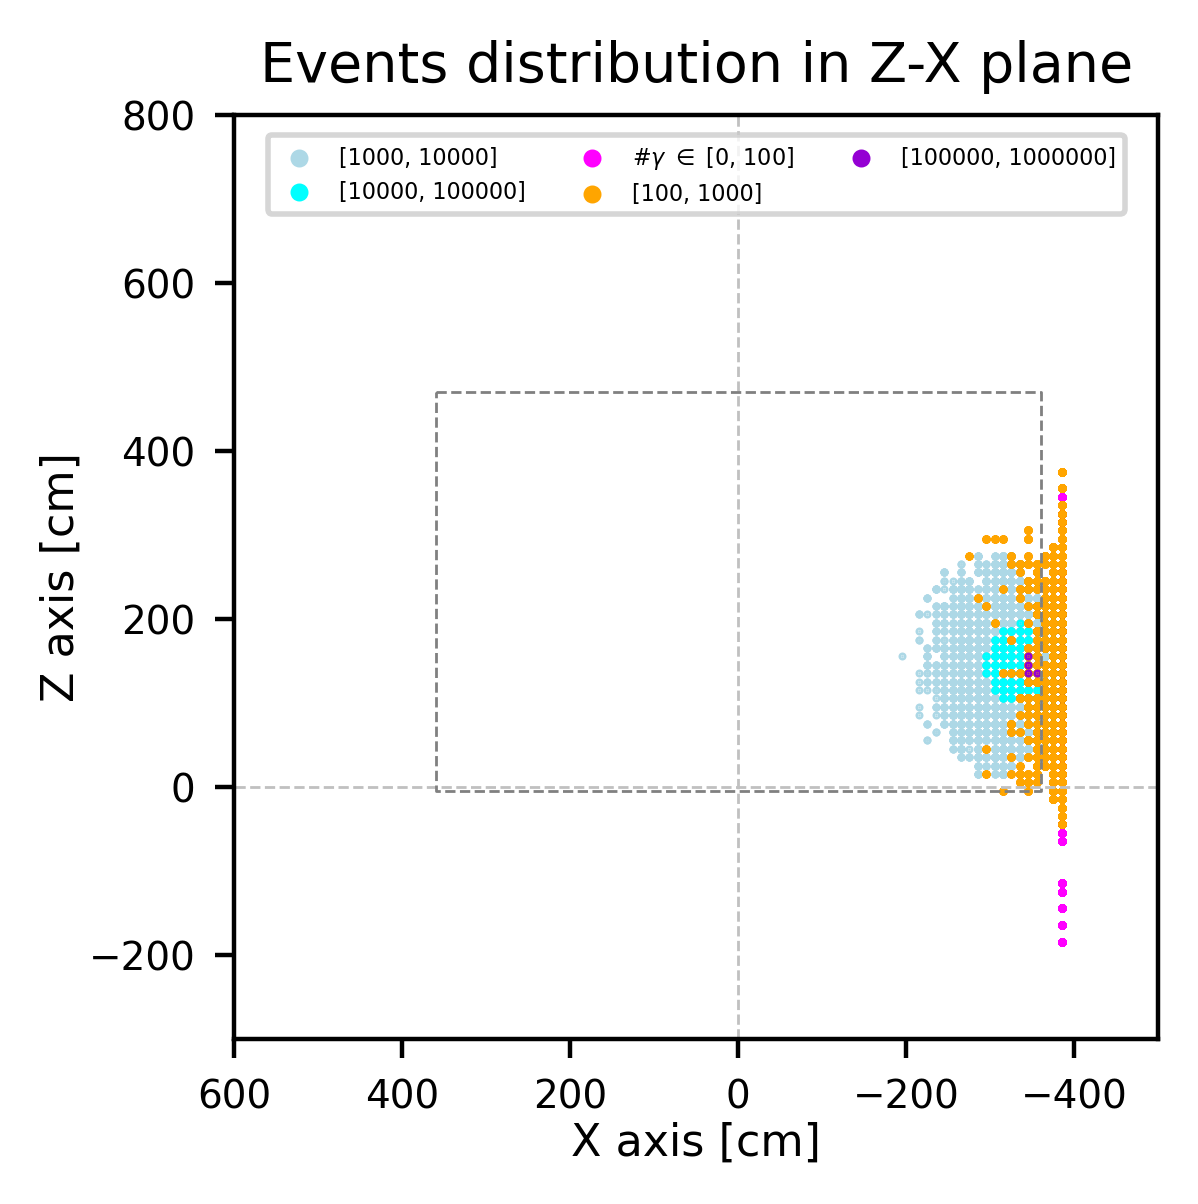

In [4]:
import matplotlib.pyplot as plt
import numpy as np

range100 = 0 #events numbers within [0, 100]
range1000 = 0 #(100, 1000]
range10000 = 0 #(1000, 10000]
range100000 = 0 #(10000, 100000]
range1000000 = 0 #(100000, 1000000]


rows = 2
list100 = [[] for _ in range(rows)]#2D list, list100[0] is label; list100[1] is photon num
list1000 = [[] for _ in range(rows)]
list10000 = [[] for _ in range(rows)]
list100000 = [[] for _ in range(rows)]
list1000000 = [[] for _ in range(rows)]


for simu in emulValues:
    if simu <= 100:
        range100 += 1
        list100[0].append(emulValues.index(simu))
        list100[1].append(simu)
    elif 100 < simu <= 1000:
        range1000 += 1
        list1000[0].append(emulValues.index(simu))
        list1000[1].append(simu)
    elif 1000 < simu <= 10000:
        range10000 += 1
        list10000[0].append(emulValues.index(simu))
        list10000[1].append(simu)
    elif 10000 < simu <= 100000:
        range100000 += 1
        list100000[0].append(emulValues.index(simu))
        list100000[1].append(simu)
    elif 100000 < simu <= 1000000:
        range1000000 += 1
        list1000000[0].append(emulValues.index(simu))
        list1000000[1].append(simu)
        
print("# event in [0, 100]         : ", range100)
print("# event in (100, 1000]      : ", range1000)
print("# event in (1000, 10000]    : ", range10000)
print("# event in (10000, 100000]  : ", range100000)
print("# event in (100000, 1000000]: ", range1000000)
totalNum = range100+range1000+range10000+range100000+range1000000
print("\nTotal event nums            : ", totalNum)

print("\nlist length of [0, 100]         : ", len(list100[1]))
print("list length of (100, 1000]      : ", len(list1000[1]))
print("list length of (1000, 10000]    : ", len(list10000[1]))
print("list length of (10000, 100000]  : ", len(list100000[1]))
print("list length of (100000, 1000000]: ", len(list1000000[1]))
#print("\nlist1000000[][]: ", list1000000)
print("\n")



#Divide posX, posY and posZ into different (5) groups---
rows = 5
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list100[0]]#corresponding to list100
groupX[1] = [posX[i] for i in list1000[0]]#corresponding to list1000
groupX[2] = [posX[i] for i in list10000[0]]
groupX[3] = [posX[i] for i in list100000[0]]
groupX[4] = [posX[i] for i in list1000000[0]]

groupY[0] = [posY[i] for i in list100[0]]#corresponding to list100
groupY[1] = [posY[i] for i in list1000[0]]#corresponding to list1000
groupY[2] = [posY[i] for i in list10000[0]]
groupY[3] = [posY[i] for i in list100000[0]]
groupY[4] = [posY[i] for i in list1000000[0]]

groupZ[0] = [posZ[i] for i in list100[0]]#corresponding to list100
groupZ[1] = [posZ[i] for i in list1000[0]]#corresponding to list1000
groupZ[2] = [posZ[i] for i in list10000[0]]
groupZ[3] = [posZ[i] for i in list100000[0]]
groupZ[4] = [posZ[i] for i in list1000000[0]]

for i in range(0, 5):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))



    
    
    
    
    

#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -500
xmax = 600
ymin = -200
ymax = 800
zmin = -300
zmax = 800

#Y-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(xmin, xmax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(ymin, ymax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi2, yauxi1, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi2, xauxi1, color="silver", linewidth=0.5, linestyle='--')


# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [-10, 620, 620, -10, -10]
cageXY_x = [360, 360, -360, -360, 360]
plt.plot(cageXY_x, cageXY_y, color="grey", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupX[2], groupY[2], c='lightblue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupY[3], c='cyan', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[0], groupY[0], c='magenta', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupX[1], groupY[1], c='orange', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[4], groupY[4], c='darkviolet', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.title('Events distribution in Y-X plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YX.png')
plt.show()    
#---------------------------------------------------------





#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')


# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupZ[2], groupY[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupZ[3], groupY[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupZ[0], groupY[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupZ[1], groupY[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupZ[4], groupY[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Y-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YZ.png')
plt.show()    
#---------------------------------------------------------






#Z-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


#auxiliary line, along y(geo) axis---
yauxi5 = [zmin, zmax]
yauxi6 = [0, 0]
plt.plot(yauxi6, yauxi5, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [xmin, xmax]
plt.plot(xauxi6, xauxi5, color="silver", linewidth=0.5, linestyle='--')


# Define the field cage frame, start from top right, anti-clockwise---
cageZY_x = [360, -360, -360, 360, 360]
cageZY_z = [470, 470, -5, -5, 470]
plt.plot(cageZY_x, cageZY_z, color="grey", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupX[2], groupZ[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupZ[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[0], groupZ[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupX[1], groupZ[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[4], groupZ[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(zmin, zmax)
plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Z-X plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_ZX.png')
plt.show()    
#---------------------------------------------------------